# P1W3D3PM - Advance Feature Engineering

## Definition

**A classification data set with skewed class proportions is called imbalanced.** Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes.

**What counts as imbalanced?** The answer could range from mild to extreme, as the table below shows.

| Degree of imbalance | Proportion of Minority Class |
| --- | --- |
| Mild | 20-40% of the data set |
| Moderate | 1-20% of the data set |
| Extreme | < 1% of the data set |

Consider the following example of a model that detects fraud. Instances of fraud happen once per 200 transactions in this data set, so in the true distribution, about 0.5% of the data is positive.

<img src='https://developers.google.com/machine-learning/data-prep/images/distribution-true-v2.svg'>

Why would this be problematic? With so few positives relative to negatives, the training model will spend most of its time on negative examples and not learn enough from positive ones. **Machine learning algorithm learn poorly when one class dominates another.**

In practice, you will encounter imbalanced data more often than not. **This does not necessarily have to be a problem if your target only has a slight imbalance. You could then resolve it by using proper validation measures for the data such as Balanced Accuracy, Precision-Recall Curves or F1-score.** Unfortunately, this is not always the case and your target variable might be highly imbalanced (e.g., 10:1). Instead, you can oversample the minority target in order to introduce balance using a technique called SMOTE.

## SMOTE (Synthetic Minority Oversampling Technique)

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. 

SMOTE stands for Synthetic Minority Oversampling Technique and is an oversampling technique used to increase the samples in a minority class. It generates new samples by looking at the feature space of the target and detecting nearest neighbors. Then, it simply selects similar samples and changes a column at a time randomly within the feature space of the neighboring samples.

**Step by step to do SMOTE:**
1. SMOTE first selects a minority class instance `a` at random and finds its `k` nearest minority class neighbors. 
2. The synthetic instance is then created by choosing one of the k nearest neighbors `b` at random and connecting `a` and `b` to form a line segment in the feature space. 
3. The synthetic instances are generated as a convex combination of the two chosen instances `a` and `b`.

<img src='https://rikunert.com/wp-content/uploads/2017/11/the-basic-principle-of-the-synthetic-minority-oversample-technique-smote-algorithm-5452514.png.webp'>

The module to implement SMOTE can be found within the `imbalanced-learn` package. You can simply import the package and apply a `fit_resamples`:

In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Data and Create X, y

df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w3/P1W3D3PM%20-%20Advance%20Feature%20Engineering%20-%20creditcard_small.csv')
X = df.iloc[:,:-1]
y = df.iloc[:,-1].map({1:'Fraud', 0:'No Fraud'})
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5487,18122.0,1.198062,0.443234,0.560636,1.410008,-0.368890,-1.102607,0.150584,-0.338192,1.243978,...,-0.093322,-0.006833,-0.058852,0.663690,0.615873,-0.388679,-0.015156,0.019629,18.00,0
5488,55444.0,1.179882,0.312858,0.437421,1.375927,-0.039510,-0.156000,0.134561,-0.077016,0.121664,...,-0.093379,0.039509,-0.068923,0.125243,0.703945,-0.315786,0.048618,0.017166,1.00,0
5489,63145.0,1.488454,-1.168367,1.128004,-1.207622,-1.823504,-0.129164,-1.476962,-0.039043,-1.235553,...,-0.251672,-0.064721,0.008336,0.054322,0.348392,-0.177230,0.089523,0.031241,8.00,0
5490,80777.0,1.273197,0.545680,-0.100356,1.102560,0.096623,-1.176898,0.602877,-0.396342,-0.385785,...,0.012428,0.123276,-0.155587,0.425921,0.875621,-0.299058,-0.003739,0.012861,3.80,0


In [3]:
# Check Distribution of y

y.value_counts()

No Fraud    5000
Fraud        492
Name: Class, dtype: int64

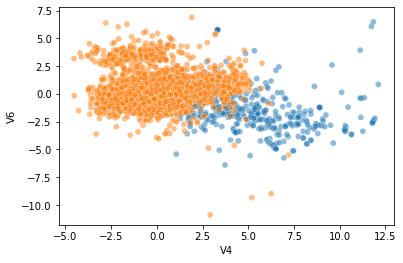

In [4]:
# Plot Features V4 and V6

sns.scatterplot(x=X.V4, y=X.V6, hue=y, alpha=.5, legend=False)

In [5]:
# SMOTE

from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(sampling_strategy='minority').fit_resample(X, y) # Minority Class will have same the same number as the majority class
# X_resampled, y_resampled = SMOTE(sampling_strategy={"Fraud":1000}).fit_resample(X, y) # Minority Class will have 1000 data
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled.value_counts()

Fraud       5000
No Fraud    5000
Name: Class, dtype: int64

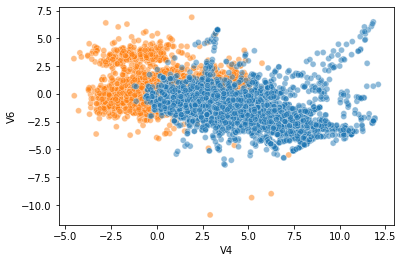

In [6]:
sns.scatterplot(x=X_resampled.V4, y=X_resampled.V6, hue=y_resampled, alpha=.5, legend=False)

As you can see the model successfully oversampled the target variable.

---

**Additional tip 1**: If you have categorical variables in your dataset SMOTE is likely to create values for those variables that cannot happen. For example, if you have a variable called `isMale`, which could only take `0` or `1`, then SMOTE might create `0.365` as a value.

Instead, **you can use `SMOTENC` which takes into account the nature of categorical variables**. This version is also available in the `imbalanced-learn` package.

**Additional tip 2**: **Make sure to oversample after creating the train/test split** so that you only oversample the train data. You typically do not want to test your model on synthetic data.

**Additional tip 3**: The purpose of oversampling is to have a better prediction model. **This technique was not created for any analysis purposes** as every data created is synthetic, so that is a reminder.

## Usage Example 1 : Fraud Detection 1

For this usage, we will use the above dataset ([link](https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w3/P1W3D3PM%20-%20Advance%20Feature%20Engineering%20-%20creditcard_small.csv)).



In [7]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

In [8]:
# Import Data and Create X, y

df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w3/P1W3D3PM%20-%20Advance%20Feature%20Engineering%20-%20creditcard_small.csv')
X = df.iloc[:,:-1]
y = df.iloc[:,-1].map({1:'Fraud', 0:'No Fraud'})
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5487,18122.0,1.198062,0.443234,0.560636,1.410008,-0.368890,-1.102607,0.150584,-0.338192,1.243978,...,-0.093322,-0.006833,-0.058852,0.663690,0.615873,-0.388679,-0.015156,0.019629,18.00,0
5488,55444.0,1.179882,0.312858,0.437421,1.375927,-0.039510,-0.156000,0.134561,-0.077016,0.121664,...,-0.093379,0.039509,-0.068923,0.125243,0.703945,-0.315786,0.048618,0.017166,1.00,0
5489,63145.0,1.488454,-1.168367,1.128004,-1.207622,-1.823504,-0.129164,-1.476962,-0.039043,-1.235553,...,-0.251672,-0.064721,0.008336,0.054322,0.348392,-0.177230,0.089523,0.031241,8.00,0
5490,80777.0,1.273197,0.545680,-0.100356,1.102560,0.096623,-1.176898,0.602877,-0.396342,-0.385785,...,0.012428,0.123276,-0.155587,0.425921,0.875621,-0.299058,-0.003739,0.012861,3.80,0


In [9]:
# Get Info Dataset

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5492 entries, 0 to 5491
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5492 non-null   float64
 1   V1      5492 non-null   float64
 2   V2      5492 non-null   float64
 3   V3      5492 non-null   float64
 4   V4      5492 non-null   float64
 5   V5      5492 non-null   float64
 6   V6      5492 non-null   float64
 7   V7      5492 non-null   float64
 8   V8      5492 non-null   float64
 9   V9      5492 non-null   float64
 10  V10     5492 non-null   float64
 11  V11     5492 non-null   float64
 12  V12     5492 non-null   float64
 13  V13     5492 non-null   float64
 14  V14     5492 non-null   float64
 15  V15     5492 non-null   float64
 16  V16     5492 non-null   float64
 17  V17     5492 non-null   float64
 18  V18     5492 non-null   float64
 19  V19     5492 non-null   float64
 20  V20     5492 non-null   float64
 21  V21     5492 non-null   float64
 22  

In [10]:
# Check Target

y.value_counts()

No Fraud    5000
Fraud        492
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


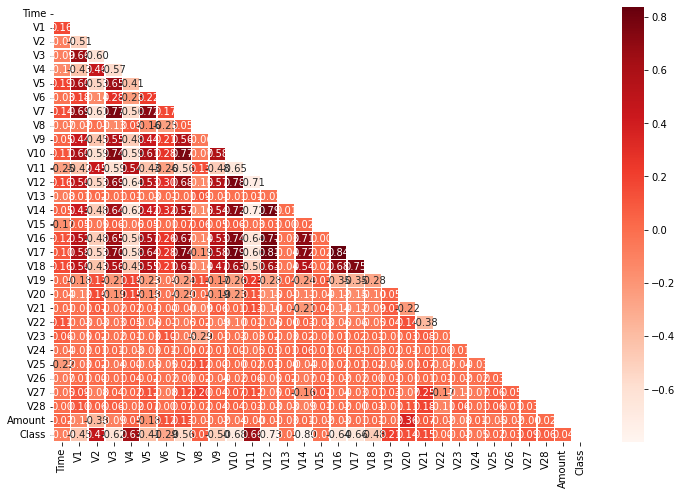

In [11]:
fig, ax = plt.subplots(figsize=(12,8))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5, fmt=".2f")

In [12]:
# Get List of All Correlation of SalePrice

final_column = df.corr()['Class'] >= 0.1
final_column = final_column[final_column==True]
final_column

V2       True
V4       True
V11      True
V19      True
V20      True
V21      True
Class    True
Name: Class, dtype: bool

In [13]:
# Cleaning Final Column

final_column = final_column.index.tolist()
final_column.remove('Class')
print('Final Column : ', final_column)

Final Column :  ['V2', 'V4', 'V11', 'V19', 'V20', 'V21']


In [14]:
X[final_column]

,V2,V4,V11,V19,V20,V21
0,1.951992,3.997906,3.202033,0.416956,0.126911,0.517232
1,-3.157307,2.288644,-0.414575,0.283345,2.102339,0.661696
2,1.759247,2.330243,2.032912,-1.334441,-0.430022,-0.294166
3,1.358367,2.679787,4.895844,0.308334,-0.171608,0.573574
4,3.019740,4.732795,2.101344,-2.721853,0.009061,-0.379068
...,...,...,...,...,...,...
5487,0.443234,1.410008,0.845959,-0.701291,-0.170194,-0.093322
5488,0.312858,1.375927,-0.344995,-0.372931,-0.133324,-0.093379
5489,-1.168367,-1.207622,-0.951153,0.044967,-0.240283,-0.251672
5490,0.545680,1.102560,-0.240922,-0.258713,-0.105577,0.012428


In [15]:
# Splitting Dataset

X_train_imbalanced, X_test, y_train_imbalanced, y_test = train_test_split(X[final_column], y, test_size=0.3, stratify=y, random_state=10)
y_train_imbalanced.value_counts()

No Fraud    3500
Fraud        344
Name: Class, dtype: int64

In [16]:
# Feature Scaling

sc = StandardScaler()
sc = sc.fit(X_train_imbalanced)
X_train_imbalanced = sc.transform(X_train_imbalanced)
X_test = sc.transform(X_test)

### Version 1 : Train & Test with Logistic Regression without Handling Imbalanced Dataset

In [17]:
# Train with Logistic Regression

lr_1 = LogisticRegression()
lr_1.fit(X_train_imbalanced, y_train_imbalanced)

LogisticRegression()

### Version 2 : Train & Test with Logistic Regression with Handling Imbalanced Dataset

In [18]:
smote = SMOTE(k_neighbors=5, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_imbalanced, y_train_imbalanced)
y_train_balanced.value_counts()

No Fraud    3500
Fraud       3500
Name: Class, dtype: int64

In [19]:
# Train with Logistic Regression

lr_2 = LogisticRegression()
lr_2.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

### Results Comparisons

In [20]:
# Check Train Results

print(classification_report(y_train_imbalanced, lr_1.predict(X_train_imbalanced)))
print(classification_report(y_train_balanced, lr_2.predict(X_train_balanced)))

              precision    recall  f1-score   support

       Fraud       0.95      0.76      0.84       344
    No Fraud       0.98      1.00      0.99      3500

    accuracy                           0.97      3844
   macro avg       0.96      0.88      0.91      3844
weighted avg       0.97      0.97      0.97      3844

              precision    recall  f1-score   support

       Fraud       0.95      0.88      0.91      3500
    No Fraud       0.89      0.95      0.92      3500

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000



In [21]:
# Check Test Results

print(classification_report(y_test, lr_1.predict(X_test)))
print(classification_report(y_test, lr_2.predict(X_test)))

              precision    recall  f1-score   support

       Fraud       0.97      0.75      0.85       148
    No Fraud       0.98      1.00      0.99      1500

    accuracy                           0.98      1648
   macro avg       0.97      0.87      0.92      1648
weighted avg       0.98      0.98      0.97      1648

              precision    recall  f1-score   support

       Fraud       0.63      0.90      0.74       148
    No Fraud       0.99      0.95      0.97      1500

    accuracy                           0.94      1648
   macro avg       0.81      0.92      0.85      1648
weighted avg       0.96      0.94      0.95      1648



From the above results, you might think that the results without dataset balancing are better than the results of dataset balancing in terms of accuracy scores. 

However, keep in mind, this case is **to minimize/detect fraud**. Therefore, **the use of accuracy is not appropriate in this case. Recall is more approriate in this case.** It can be seen that by balancing the dataset, a higher recall is obtained than the recall without balancing the dataset

## Usage Example 2 : Churn Detection



For this experiment, we will use dataset from [Kaggle](https://www.kaggle.com/shubh0799/churn-modelling). You can use the dataset from this [link](https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/p1_development/p1/v3/w3/P1W3D3PM%20-%20Advance%20Feature%20Engineering%20-%20Churn_Modelling.csv).

In [22]:
# Import Data and Create X, y

df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w3/P1W3D3PM%20-%20Advance%20Feature%20Engineering%20-%20Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [23]:
# Get Info Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [24]:
# Split Between Numerical Columns and Categorical Columns

num_cols = df._get_numeric_data().columns.tolist()
num_cols.remove('Exited')
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns     : ', num_cols)
print('Categorical Columns : ', cat_cols)

Numeric Columns     :  ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Categorical Columns :  ['Surname', 'Geography', 'Gender']


In [25]:
# Check Target

df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [26]:
# Split Dataset

X = df.drop(['Exited'], axis = 1)
y = df['Exited']

X_train_imbalanced, X_test, y_train_imbalanced, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)
y_train_imbalanced.value_counts()

0    5574
1    1426
Name: Exited, dtype: int64

### Version 1 : Train & Test with Logistic Regression wihout Handling Imbalanced Dataset

In [27]:
# Feature Scaling

X_train_imbalanced_num = X_train_imbalanced[num_cols].reset_index().drop(['index'], axis = 1)
X_train_imbalanced_cat = X_train_imbalanced[cat_cols].reset_index().drop(['index'], axis = 1)

# Numeric Scaling
sc = StandardScaler()
sc = sc.fit(X_train_imbalanced_num)
X_train_imbalanced_num = sc.transform(X_train_imbalanced_num)

# Ordinal Encoder
ore = OrdinalEncoder()
ore = ore.fit(X_train_imbalanced_cat)
X_train_imbalanced_cat = ore.transform(X_train_imbalanced_cat)

# Merge X_train
X_train_imbalanced_final = np.concatenate([X_train_imbalanced_num, X_train_imbalanced_cat], axis=1)

In [28]:
# Train with Logistic Regression

lr_1 = LogisticRegression()
lr_1.fit(X_train_imbalanced_final, y_train_imbalanced)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### Version 2 : Train & Test with Logistic Regression with Handling Imbalanced Dataset

In [29]:
# Feature Scaling

X_train_imbalanced_num = X_train_imbalanced[num_cols].reset_index().drop(['index'], axis = 1)
X_train_imbalanced_cat = X_train_imbalanced[cat_cols].reset_index().drop(['index'], axis = 1)

# Numeric Scaling
sc = StandardScaler()
sc = sc.fit(X_train_imbalanced_num)
X_train_imbalanced_num = sc.transform(X_train_imbalanced_num)

In [30]:
# Merge with Categorical Column

X_train_imbalanced_new = pd.DataFrame(data=X_train_imbalanced_num, columns=num_cols)
X_train_imbalanced_new = pd.concat([X_train_imbalanced_new, X_train_imbalanced_cat], axis=1)
X_train_imbalanced_new

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname,Geography,Gender
0,1.069679,1.728175,-1.787792,-0.754076,1.374792,-1.209750,0.814000,-1.546439,0.966835,1.461023,Carter,Spain,Male
1,1.737318,-1.420791,-0.453470,-0.849926,1.030084,1.666689,0.814000,0.646647,0.966835,-1.710029,Mancini,Spain,Male
2,0.502568,-1.726672,1.480780,0.012721,-0.693453,0.988845,-0.917915,-1.546439,-1.034302,-0.281013,Gray,France,Male
3,1.125836,-1.218836,-1.725731,-1.137475,-1.382868,0.031479,-0.917915,0.646647,0.966835,-1.706765,Lucchesi,France,Male
4,0.406548,1.619287,-0.401752,-0.849926,1.374792,0.203587,-0.917915,0.646647,-1.034302,1.674657,Udobata,France,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,-0.298875,-0.330156,0.177488,-0.562377,-0.348745,-1.209750,0.814000,0.646647,0.966835,0.551796,Meng,France,Male
6996,-1.506933,-1.418129,-0.008696,0.779518,-1.382868,-1.209750,0.814000,0.646647,0.966835,0.791333,Ts'ai,France,Male
6997,-1.429977,-1.651808,-0.039727,0.683668,-1.382868,1.515436,0.814000,0.646647,-1.034302,-0.959219,Wu,Germany,Male
6998,-0.299222,1.008250,0.518827,-0.849926,1.374792,-1.209750,-0.917915,0.646647,0.966835,1.302780,Little,France,Female


In [31]:
# SMOTE-NC

from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC([10, 11, 12], random_state = 42)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_imbalanced_new, y_train_imbalanced)
y_train_balanced.value_counts()

0    5574
1    5574
Name: Exited, dtype: int64

In [32]:
# Split between Numerical Features and Categorical Features

X_train_balanced_num = X_train_balanced[num_cols].reset_index().drop(['index'], axis = 1)
X_train_balanced_cat = X_train_balanced[cat_cols].reset_index().drop(['index'], axis = 1)

In [33]:
# Convert Categorical Features

# Ordinal Encoder
ore = OrdinalEncoder()
ore = ore.fit(X_train_balanced_cat)
X_train_balanced_cat = ore.transform(X_train_balanced_cat)

In [34]:
# Merge Numerical Features with Categorical Column

X_train_balanced_final = pd.DataFrame(data=X_train_balanced_cat, columns=cat_cols)
X_train_balanced_final = pd.concat([X_train_balanced_num, X_train_balanced_final], axis=1)
X_train_balanced_final

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname,Geography,Gender
0,1.069679,1.728175,-1.787792,-0.754076,1.374792,-1.209750,0.814000,-1.546439,0.966835,1.461023,358.0,2.0,1.0
1,1.737318,-1.420791,-0.453470,-0.849926,1.030084,1.666689,0.814000,0.646647,0.966835,-1.710029,1397.0,2.0,1.0
2,0.502568,-1.726672,1.480780,0.012721,-0.693453,0.988845,-0.917915,-1.546439,-1.034302,-0.281013,890.0,0.0,1.0
3,1.125836,-1.218836,-1.725731,-1.137475,-1.382868,0.031479,-0.917915,0.646647,0.966835,-1.706765,1349.0,0.0,1.0
4,0.406548,1.619287,-0.401752,-0.849926,1.374792,0.203587,-0.917915,0.646647,-1.034302,1.674657,2234.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11143,0.493816,-1.610626,0.790871,0.918627,-0.081826,0.656006,0.423168,-1.546439,-1.034302,1.424314,62.0,0.0,1.0
11144,1.188838,0.051678,-0.102148,0.233713,-1.455876,1.110213,0.814000,-1.546439,0.966835,-0.216029,1202.0,1.0,1.0
11145,0.729223,-1.394672,0.614186,-0.394138,-0.277232,-1.209750,-0.917915,0.646647,-1.034302,1.517456,1443.0,0.0,1.0
11146,0.286716,-0.661987,0.267195,0.815348,0.556520,0.566136,0.814000,0.646647,-1.034302,0.921232,668.0,1.0,0.0


In [35]:
# Train with Logistic Regression

lr_2 = LogisticRegression()
lr_2.fit(X_train_balanced_final, y_train_balanced)

LogisticRegression()

### Result Comparisons

In [36]:
# Check Train Results

print(classification_report(y_train_imbalanced, lr_1.predict(X_train_imbalanced_final)))
print(classification_report(y_train_balanced, lr_2.predict(X_train_balanced_final)))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5574
           1       0.63      0.19      0.29      1426

    accuracy                           0.81      7000
   macro avg       0.73      0.58      0.59      7000
weighted avg       0.78      0.81      0.77      7000

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      5574
           1       0.71      0.70      0.70      5574

    accuracy                           0.70     11148
   macro avg       0.70      0.70      0.70     11148
weighted avg       0.70      0.70      0.70     11148



In [37]:
# Feature Scaling on X_test

## Split between Numerical Features and Categorical Features
X_test_num = X_test[num_cols].reset_index().drop(['index'], axis = 1)
X_test_cat = X_test[cat_cols].reset_index().drop(['index'], axis = 1)

## Numerical Scaling
X_test_num = sc.transform(X_test_num)

## Categorical Encoder
ore = OrdinalEncoder()
ore = ore.fit(X_test_cat)
X_test_cat = ore.transform(X_test_cat)

## Merge X_test
X_test_final = np.concatenate([X_test_num, X_test_cat], axis=1)

In [38]:
# Check Test Results

print(classification_report(y_test, lr_1.predict(X_test_final)))
print(classification_report(y_test, lr_2.predict(X_test_final)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      2389
           1       0.55      0.18      0.28       611

    accuracy                           0.80      3000
   macro avg       0.69      0.57      0.58      3000
weighted avg       0.77      0.80      0.76      3000

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      2389
           1       0.38      0.67      0.48       611

    accuracy                           0.71      3000
   macro avg       0.64      0.69      0.64      3000
weighted avg       0.79      0.71      0.73      3000



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
